## Faces VS Non-Faces

**DATASET**
- NON-FACES (400 data)
  
    - mobil (50 data)
    - motor (50 data)
    - buah (50 data)
    - bunga (50 data)
    - kamar mandi (50 data)
    - pesawat (50 data)
    - barbel (50 data)
    - cincin (50 data)

- FACES (400 data)

    - 40 wajah tiap kelas terdiri 10 gambar

**DAFTAR ISI**
1. Impor Library
2. Persiapan Data

    2.1. Loading Data ke Matrices

    2.2. Splitting Data ke Training dan Testing
3. Linear Discriminant Analysis

  3.1. Persiapan LDA

  3.1.2. Generating new space

  3.2. Klasifikasi Menggunakan LDA

    3.2.1. Main Function

    3.2.2. Plotting Results

    3.2.3. Success & Failure Cases

### 1. Import Libarary

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### 2. Persiapan Data

**DATASET NON-FACE**

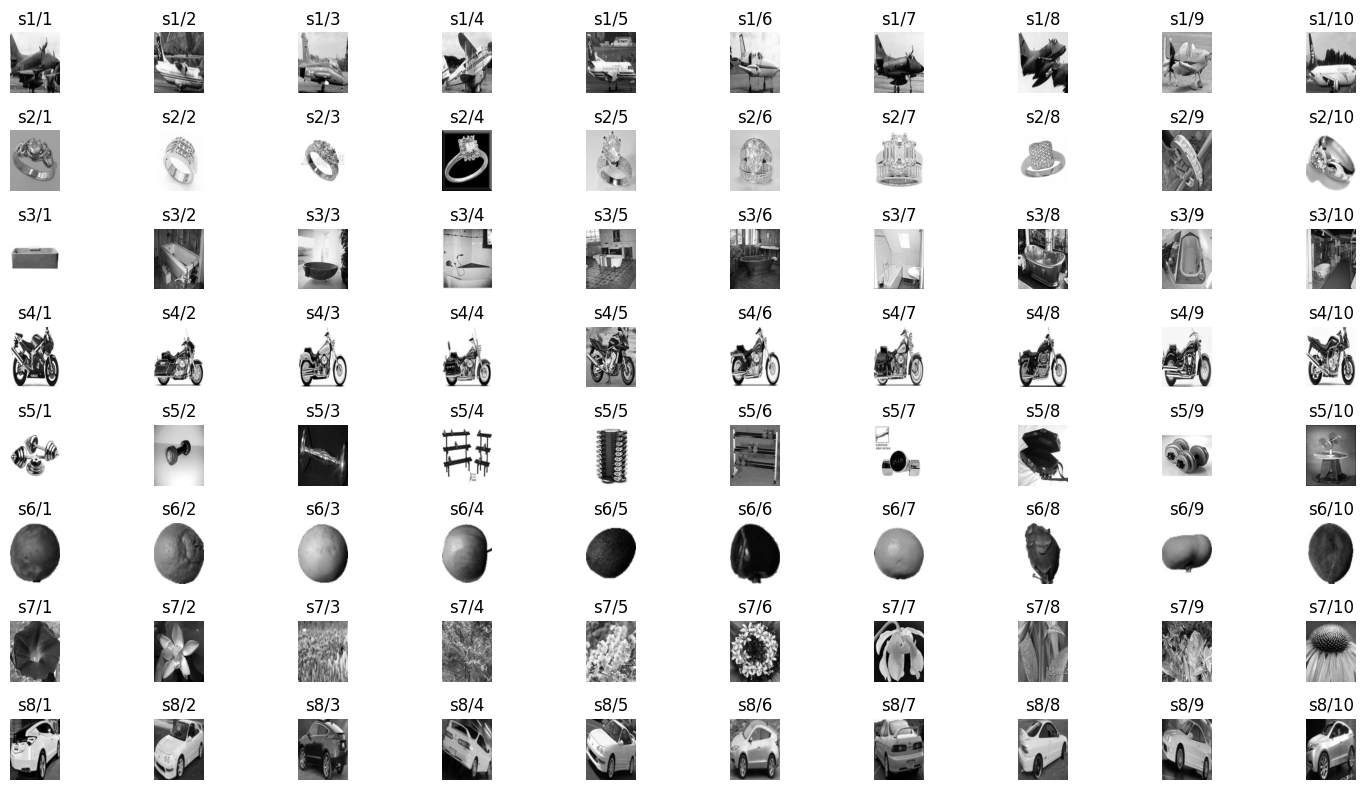

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image  # Mengimpor Pustaka Pengolahan Gambar Python

# Ganti dengan path ke folder yang berisi folder-folder dengan gambar .jpg
folder_induk = '/content/drive/MyDrive/Pengolahan Citra/Dataset Wajah/nonface_archive'
kelas = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8']
batasan_per_kelas = 10  # Ganti dengan jumlah gambar yang ingin ditampilkan per kelas

# Set ukuran plot
plt.figure(figsize=(15, 8))

idx = 1
for kelas_folder in kelas:
    folder_gambar = os.path.join(folder_induk, kelas_folder)

    # Ambil list file .jpg dalam folder
    gambar_jpg = [filename for filename in os.listdir(folder_gambar) if filename.lower().endswith('.jpg')]

    # Ambil sejumlah gambar sesuai batasan atau jumlah yang tersedia jika kurang dari batasan
    jumlah_gambar_kelas = min(batasan_per_kelas, len(gambar_jpg))
    gambar_pilihan = gambar_jpg[:jumlah_gambar_kelas]

    # Loop untuk menampilkan gambar dalam subplot
    for i, filename in enumerate(gambar_pilihan, 1):
        path = os.path.join(folder_gambar, filename)
        img = Image.open(path).convert('L')  # Buka gambar dan konversi ke skala abu-abu
        plt.subplot(len(kelas), batasan_per_kelas, idx)
        plt.imshow(img, cmap='gray')  # Tampilkan gambar dalam skala abu-abu
        plt.axis('off')
        plt.title(f'{kelas_folder}/{i}')  # Menggunakan nomor urut gambar dalam kelas
        idx += 1

plt.tight_layout()
plt.show()

**DATASET FACE**

In [ ]:
import numpy as np
import os
datasetFaces = []
target = []

for person in range(1, 41):
    for pose in range(1, 11):
        file_path = f"/content/drive/MyDrive/Pengolahan Citra/Dataset Wajah/archive/s{person}/{pose}.pgm"
        if os.path.exists(file_path):  # Pastikan path file ada sebelum membaca
            datasetFaces.append(plt.imread(file_path))
            target.append(person)

datasetFaces = np.array(datasetFaces)
target = np.array(target)

print('Jumlah total dataset:', len(datasetFaces))
print('Jumlah total target:', len(target))
print('Ukuran dataset:', datasetFaces.shape)

Jumlah total dataset: 400
Jumlah total target: 400
Ukuran dataset: (400, 112, 92)


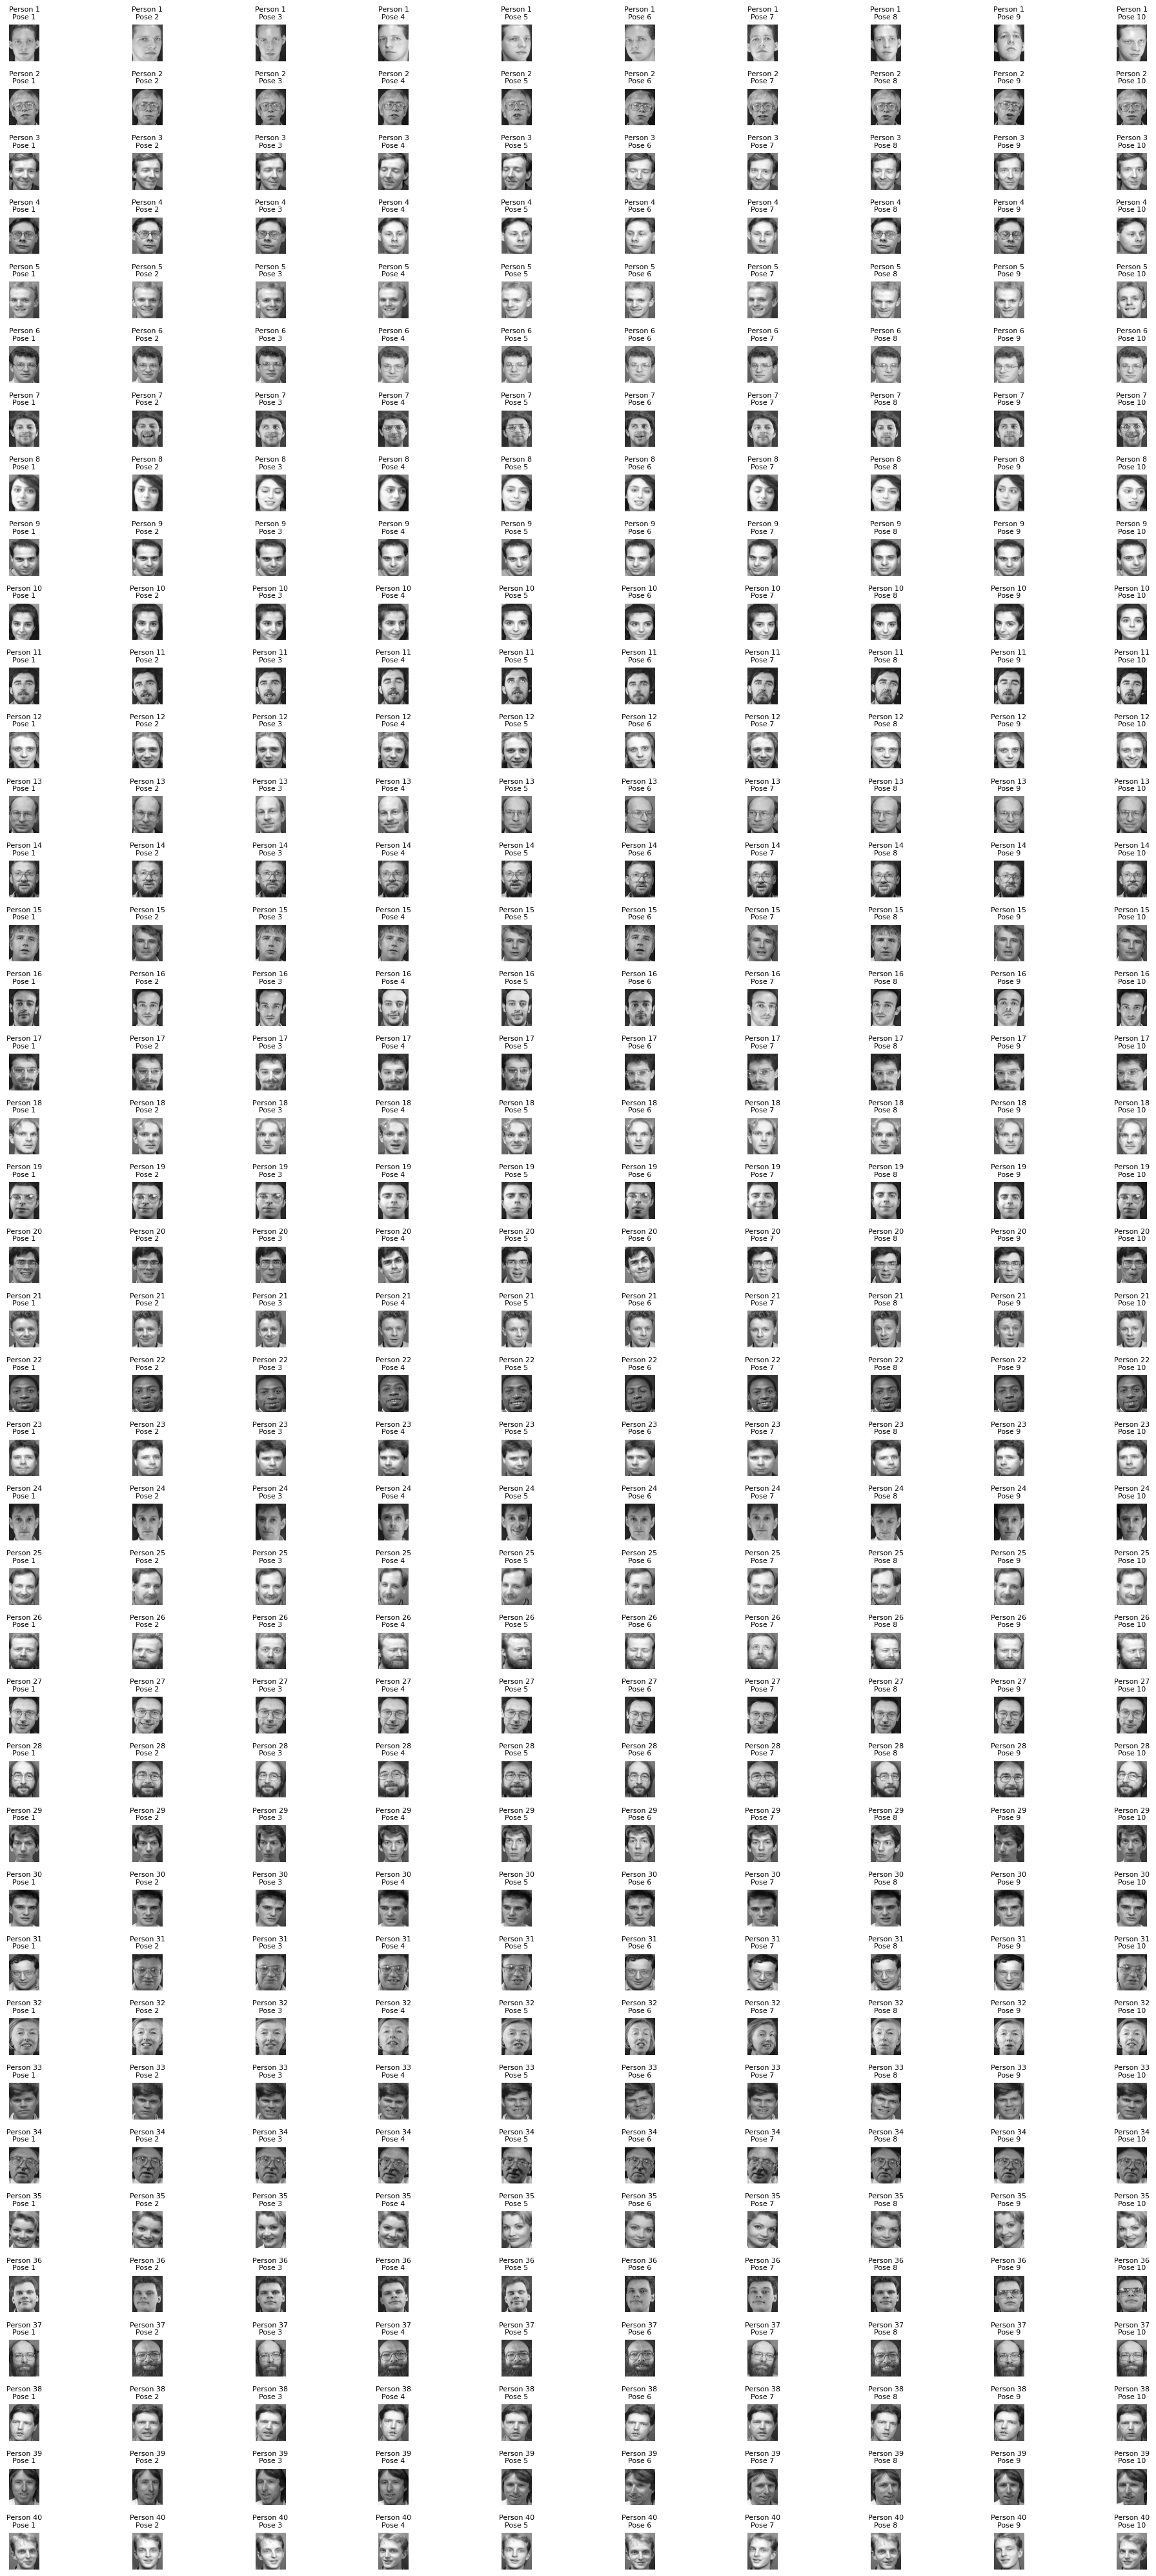

In [ ]:
# Visualisasi semua datasets Person
fig, axes = plt.subplots(40, 10, figsize=(20, 40))

for person in range(40):
    for pose in range(10):
        axes[person, pose].imshow(datasetFaces[person*10+pose], cmap='gray')
        axes[person, pose].axis('off')
        axes[person, pose].set_title(f'Person {person + 1}\nPose {pose + 1}', fontsize=8)

plt.tight_layout()
plt.show()

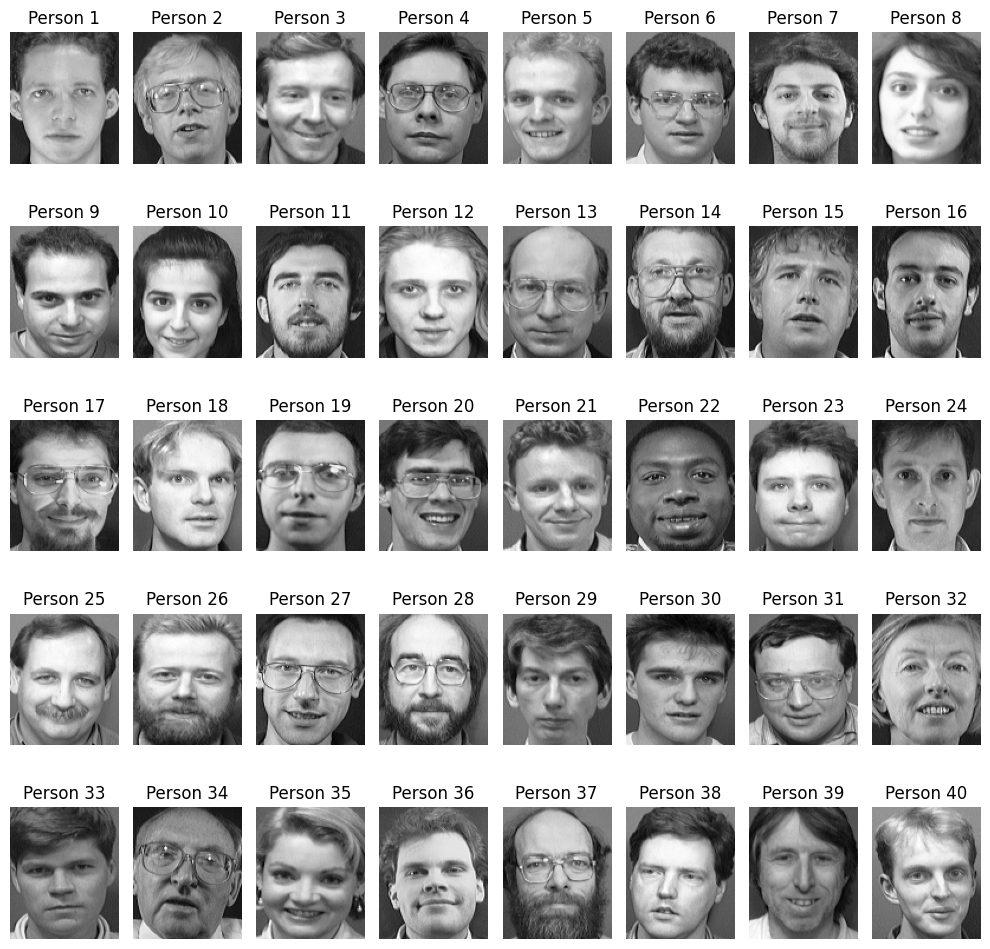

In [ ]:
# Visualisasi Person
plt.figure(figsize=(10,10))

for person in range(40):
    plt.subplot(5, 8, person+1)
    plt.imshow(datasetFaces[person*10], cmap='gray')
    plt.title('Person '+str(person+1))
    plt.axis('off')

plt.tight_layout()
plt.show()

#### 2.1. Load Data Ke Matriks

In [ ]:
# Path ke folder dataset
nonface_dataset_path = '/content/drive/MyDrive/Pengolahan Citra/Dataset Wajah/nonface_archive'
face_dataset_path = '/content/drive/MyDrive/Pengolahan Citra/Dataset Wajah/archive'

# Mendapatkan daftar direktori di folder dataset
nonface_dirs, face_dirs = os.listdir( nonface_dataset_path ), os.listdir( face_dataset_path )

# inisialisasi data dan labels
nonface_data, face_data = np.zeros( (400,10304) ), np.zeros( (400,10304) )
nonface_labels, face_labels = np.zeros( (400,1) ), np.ones( (400,1) )

# Loading data face
cnt = 0
paths = ["/content/drive/MyDrive/Pengolahan Citra/Dataset Wajah/archive/s" + str(i) for i in range(1,41)]
for path in paths:
    files = os.listdir( path )
    for file in files:
        img = Image.open( path + "/" + file )
        np_img = np.array( img ) # Konversi image ke numpy array
        np_img = np_img.flatten() # Flattening image menjadi fitur 1D
        face_data[cnt] = np_img # Menambahkan vektor gambar ke matriks data
        cnt += 1

# Loading data nonface
cnt = 0
paths = ["/content/drive/MyDrive/Pengolahan Citra/Dataset Wajah/nonface_archive/s" + str(i) for i in range(1,9)]
for path in paths:
    files = os.listdir( path )
    for file in files:
        img = Image.open( path + "/" + file )
        np_img = np.array( img )
        np_img = np_img.mean(axis=2) # Konversi image ke grayscale
        np_img = np_img.flatten()
        nonface_data[cnt] = np_img
        cnt += 1

# Mengacak data
# np.random.shuffle( face_data )
# np.random.shuffle( nonface_data )

In [ ]:
import pandas as pd

# Membuat dataframe dari data
face_df = pd.DataFrame(face_data)
nonface_df = pd.DataFrame(nonface_data)

# Menyimpan dataframe ke dalam file Excel
face_df.to_excel("face_data.xlsx", index=False)
nonface_df.to_excel("nonface_data.xlsx", index=False)

In [ ]:
print('data face',face_data)
print('data non face',nonface_data)

data face [[108. 109. 110. ...  24.  23.  30.]
 [126. 130. 131. ...  43.  51.  48.]
 [101. 106. 102. ...  46.  50.  45.]
 ...
 [131. 129. 130. ...  51.  48.  55.]
 [129. 127. 133. ...  93.  93.  93.]
 [ 41.  47.  47. ...  35.  37.  38.]]
data non face [[104.33333333 105.33333333 107.33333333 ...  82.33333333  80.
   80.        ]
 [138.         142.         145.         ... 182.         182.
  182.        ]
 [ 43.33333333  37.          43.33333333 ...  61.          58.
   57.        ]
 ...
 [213.         207.66666667 210.         ...  34.33333333  87.33333333
   42.66666667]
 [255.         255.         255.         ... 255.         255.
  255.        ]
 [182.33333333 185.33333333 183.66666667 ... 103.66666667 103.66666667
  104.66666667]]


#### 2.2. Fungsi untuk split data ke training dan testing

In [ ]:
def process_splits(face_data, nonface_data, face_labels, nonface_labels, nonface_cnt=len(nonface_data)):

    #Memotong data nonwajah untuk mengulangi jumlah gambar nonwajah tertentu (nonface_cnt)
    # nonface_cnt = len(nonface_data) secara default (semua gambar nonwajah digunakan)
    nonface_data = nonface_data[ 0 : nonface_cnt ]

    # Menggabungkan data wajah dan nonwajah
    data = np.append( face_data, nonface_data, axis=0 )
    labels = np.append( face_labels, nonface_labels, axis=0 )

    # Training set dan labels dari elemen dengan indeks genap
    training_set = data[ 0 : len(data) : 2 ]
    training_labels = labels[ 0 : len(data) : 2 ]

    # Test set dan labels dari elemen dengan indeks ganjil
    test_set = data[ 1 : len(data) : 2 ]
    test_labels = labels[ 1 : len(data) : 2 ]

    return training_set, test_set, training_labels, test_labels

In [ ]:
training_set, test_set, training_labels, test_labels = process_splits(face_data, nonface_data, face_labels, nonface_labels)

In [ ]:
print('training set', training_set.shape)
print('test set', training_set.shape)
print('training labels', training_labels.shape)
print('test labels', test_labels.shape)

training set (400, 10304)
test set (400, 10304)
training labels (400, 1)
test labels (400, 1)


### 3. Linear Discriminant Analysis

Linear Dicriminant Analysis (LDA) merupakan suatu algoritma yang digunakan untuk mengurangi dimensi (dimentional redustion) dari dataset yang berdimensi besar, dengan mengubah seperangkat variavel menjadi variabel yang lebih kecil yang mengandung sebagian besar informasi dalam set besar. proses LDA memiliki 7 proses
1. membagi data mendaji beberapa kelas
2. menghitung nilai mean tiap kelas dan mean seluruh data
3. hitung matriks sebaran within class (Sw) dan betwwn class (Sb)
4. lakukan eigen analysis untuk mendapatkan eigenvectors dan eigenvalues
5. urutkan eigenvalues dan pilik k eigenvalues terbesar
6. susun suatu matriks proyeksi (W) yang besisi eigenvectors yang bersesuai dengan k eigenvalues
7. proyeksi dta input menjadi feature vektir dengan cara men-dot product-kan data input dan matriks W dari langkah 6

#### 3.1. Persiapan LDA

##### 3.1.1. Fungsi untuk mengembalikan (return) new space dengan input data training

In [ ]:
def LDA( training_set):

    # faces = training_set[ 0 : len(face_labels) // 2 ]
    # nonfaces = training_set[ len(face_labels) // 2 : len(training_set) ]

      # Mendapatkan jumlah total data
    total_samples = len(training_set)

    # Memisahkan setengah pertama sebagai wajah (faces)
    faces = training_set[:total_samples // 2]

    # Memisahkan setengah kedua sebagai non-wajah (nonfaces)
    nonfaces = training_set[total_samples // 2:]

    # hitung rata-rata dari class-specific data (faces dan non-faces)
    face_means = np.mean( faces, axis=0 )
    nonface_means = np.mean( nonfaces, axis=0 )

    # Membentuk kembali untuk menjaga dimensi tetap konsisten
    face_means = face_means.reshape( 1, 10304 )
    nonface_means = nonface_means.reshape( 1, 10304 )

    # Hitung between-class scatter matrix (Sb)
    B = np.dot( (face_means - nonface_means).T, (face_means - nonface_means) )

    # memusatkan data
    # untuk membuat distribusi data berpusat di sekitar nilai nol.
    # Ini membantu dalam analisis statistik, khususnya dalam perhitungan kovariansi dan matriks sebar, karena menghilangkan pengaruh dari nilai rata-rata yang mungkin ada pada data.
    centered_face_data = faces - face_means
    centered_nonface_data = nonfaces - nonface_means

    # Class scatter matrices
    Z1 = np.dot( centered_face_data.T, centered_face_data )
    Z2 = np.dot( centered_nonface_data.T, centered_nonface_data )

    # menghitung within-class scatter matrix (Sw)
    S = Z1 + Z2

    # menghitung eigenvalues dan eigenvectors of the covariance matrix of the training set
    eigenvalues, eigenvectors = np.linalg.eigh( np.dot( np.linalg.inv(S), B ) )


    # Mengurutkan eigenvectors dalam urutan menurun dari nilai eigennya yang sesuai
    positions = eigenvalues.argsort()[::-1]
    sorted_eigenvectors = ( eigenvectors[:, positions] )

    # menghitung new space = proyeksi5r
    # Karena kita mempunyai 2 kelas, kita hanya membutuhkan 1 eigenvector dominan
    new_space = sorted_eigenvectors[:, :1]

    return new_space

In [ ]:
new_space = LDA( training_set)
print(new_space.shape)
print(new_space)

(10304, 1)
[[-0.03112716]
 [-0.03120547]
 [-0.03116453]
 ...
 [ 0.00107521]
 [-0.0005964 ]
 [ 0.00349094]]


#### 3.2. Klasifikasi Menggunakan LDA

##### 3.2.1. Main Training Function untuk LDA

In [ ]:
scores = []

for nonface_cnt in range( 50, len(nonface_data) + 1, 50 ):

    print( '[LDA] Running for', nonface_cnt, 'non-face images\n', nonface_cnt // 2, '-> training\n', nonface_cnt // 2, '-> test' )
    print( '----------------------------------------' )

    # Memisahkan data menjadi set pe  latihan dan pengujian sesuai dengan jumlah gambar non-wajah
    training_set, test_set, training_labels, test_labels = process_splits( face_data, nonface_data, face_labels, nonface_labels, nonface_cnt )

    # Menghitungnew space menggunakan LDA
    new_space = LDA( training_set)

    # Memusatkan training set dan test set
    centered_training_set = training_set - np.mean( training_set, axis=0 )
    centered_test_set = test_set - np.mean( test_set, axis=0 )

    # Memproyeksikan training set dan test set ke new space
    new_training_set = np.dot( centered_training_set, new_space )
    new_test_set = np.dot( centered_test_set, new_space )

    # pengklasifikasi KNN ke training set
    knn = KNeighborsClassifier( n_neighbors=1 )
    knn.fit( new_training_set, training_labels.ravel() )

    # Memprediksi hasil test set
    score = knn.score( new_test_set, test_labels.ravel() )

    # Menambahkan skor ke daftar skor untuk diplot
    scores.append( score )

    print( '[LDA] Accuracy for', nonface_cnt, 'non-face images =', '{:.2f}%\n'.format(score * 100))

[LDA] Running for 50 non-face images
 25 -> training
 25 -> test
----------------------------------------
[LDA] Accuracy for 50 non-face images = 94.22%

[LDA] Running for 100 non-face images
 50 -> training
 50 -> test
----------------------------------------
[LDA] Accuracy for 100 non-face images = 90.00%

[LDA] Running for 150 non-face images
 75 -> training
 75 -> test
----------------------------------------
[LDA] Accuracy for 150 non-face images = 88.36%

[LDA] Running for 200 non-face images
 100 -> training
 100 -> test
----------------------------------------
[LDA] Accuracy for 200 non-face images = 83.33%

[LDA] Running for 250 non-face images
 125 -> training
 125 -> test
----------------------------------------
[LDA] Accuracy for 250 non-face images = 81.85%

[LDA] Running for 300 non-face images
 150 -> training
 150 -> test
----------------------------------------
[LDA] Accuracy for 300 non-face images = 81.43%

[LDA] Running for 350 non-face images
 175 -> training
 175 

##### 3.2.2. Plotting the results

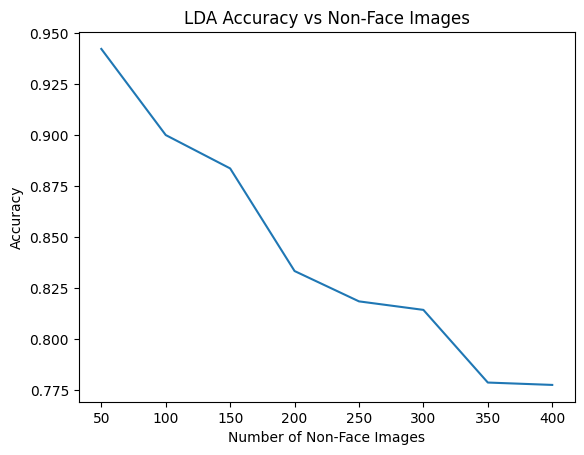

In [ ]:
plt.plot( range( 50, len(nonface_data) + 1, 50 ), scores )
plt.xlabel( 'Number of Non-Face Images' )
plt.ylabel( 'Accuracy' )
plt.title( 'LDA Accuracy vs Non-Face Images' )
plt.show()

##### 3.2.3. Success and Failure Cases

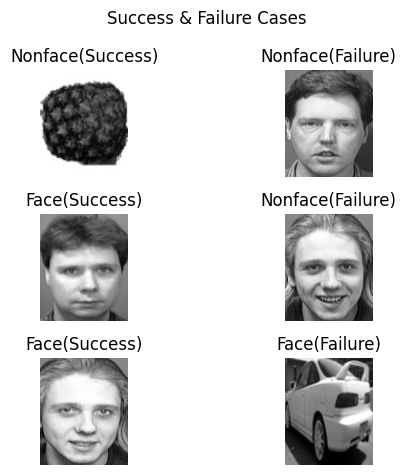

In [ ]:
fig, axs = plt.subplots( 3, 2 )
success_count = 0
failure_count = 0

while success_count < 3 or failure_count < 3:

    # secara acak memilih gambar dari set pengujian
    idx = np.random.randint( 0, len(test_set) - 1 )

    # memprediksi label gambar
    prediction = knn.predict( new_test_set[idx].reshape( 1, -1 ) )

    # memplot 3 kasus sukses dan 3 kasus kegagalan. Kasus sukses ada di sebelah kiri dan kasus kegagalan ada di sebelah kanan
    if prediction == test_labels[idx]:
        if success_count == 3: continue
        i, j = success_count, 0
        success_count += 1

    elif failure_count < 3:
        i , j = failure_count, 1
        failure_count += 1

    else:
        continue

    axs[i, j].imshow( test_set[idx].reshape( 112, 92 ), cmap='gray' )
    axs[i, j].set_title( ('Face' if prediction == 1 else 'Nonface') + ('(Failure)' if prediction != test_labels[idx] else '(Success)') )
    axs[i, j].axis( 'off' )

fig.suptitle( 'Success & Failure Cases' )
fig.tight_layout()
plt.show()